# Election Data Project - Polls and Donors

In this data project I have tried to analyse the data of 2012 elections with simple and basic techniques

I have analysed two datasets. 
The first data set is the results of political polls. 
I have analyzed this aggregated poll data and treid to answer few questions like:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

In [1]:
# For data analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [7]:
# To access the internet links
import webbrowser

In [8]:
# Opening up the csv file and directly downloading it to your computer
url = webbrowser.open("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv")


In [9]:
# Setting up the file as pandas DataFrame
poll_df = pd.read_csv("2012-general-election-romney-vs-obama.csv")
poll_df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


In [6]:
# Some glimpse of the dataframe
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [10]:
# Question Text and Question Iteration columns are not going to be useful so getting rid of that permanently
poll_df.drop(columns=["Question Text", "Question Iteration"], inplace= True)

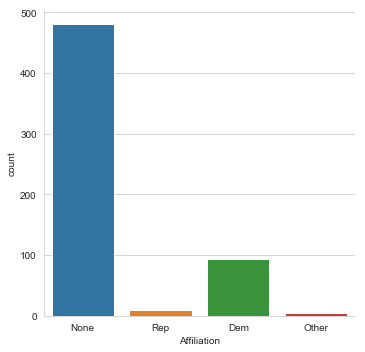

In [11]:
# This shows whether the polls were biased to any of the parties or not

sns.catplot("Affiliation", data = poll_df, kind = "count")

Looks like it is overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Now, let's see if sorting by the Population hue gives any further insight into the data.

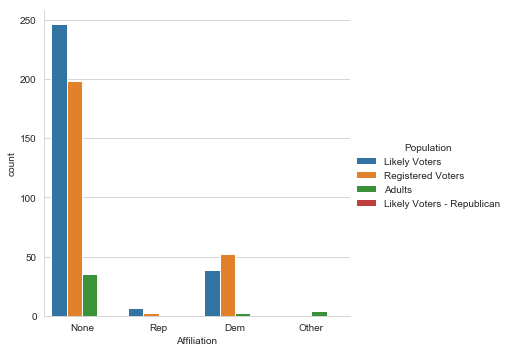

In [13]:
# Catplot the affiliation by Population
sns.catplot('Affiliation',data=poll_df,hue='Population', kind = "count")

Looks like it has a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled.

Now, let's see who was more favourable according to the polls from Obama, Romney, Other Candidates, and the Undecided polled people

In [14]:
# First we'll get the average
avg = DataFrame(poll_df.mean())
avg.drop(["Number of Observations"], inplace = True)

In [15]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [16]:
# let's have a look at the error
std = DataFrame(poll_df.std())
std.drop(["Number of Observations"], inplace = True)

In [17]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


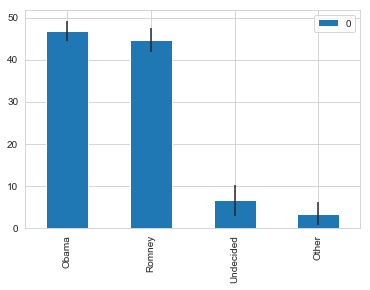

In [18]:
# plotting to visulaize the things and get the better understanding
avg.plot(yerr= std, kind = "bar")

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers again properly

In [20]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

Let's take a quick (and messy) look at time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates.

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date

In [21]:
poll_df.head(3)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None


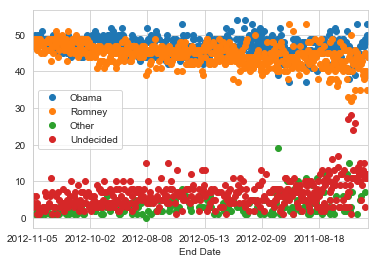

In [22]:
poll_df.plot(x= "End Date", y = ["Obama", "Romney", "Other","Undecided"], linestyle = " ", marker = "o")

This gives a quick overview on how the trend looks like since the polls started until a day before the actual elections 

Considering the difference in their favourable voting percentages, we can have some insight on the people's sentiment changing over time

In [23]:
poll_df["Difference"] = (poll_df["Obama"] - poll_df["Romney"])/100

In [24]:
poll_df["Difference"].head()

0    0.00
1    0.02
2    0.00
3    0.01
4   -0.01
Name: Difference, dtype: float64

In [25]:
poll_df = poll_df.groupby(by = "Start Date", as_index=False).mean()

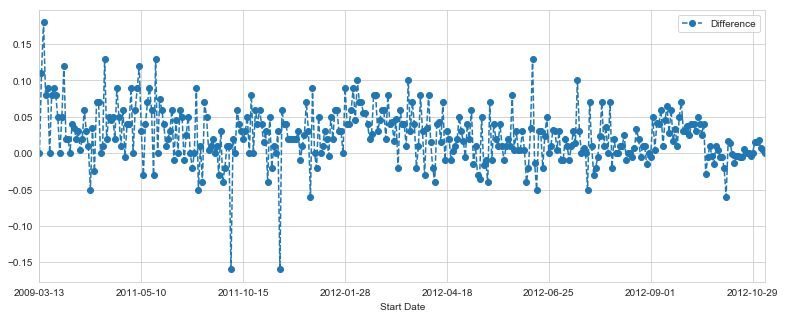

In [26]:
poll_df.plot("Start Date", "Difference", marker = "o", linestyle = "--", figsize = (13,5) )

I am gonna plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. So, I plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure I set up a loop to find out where the index for the month of October in 2012 is.

In [27]:
# Set row count and xlimit list

row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df["Start Date"]:
    if date[0:7] == "2012-10" :
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print (xlimit)


[325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352]


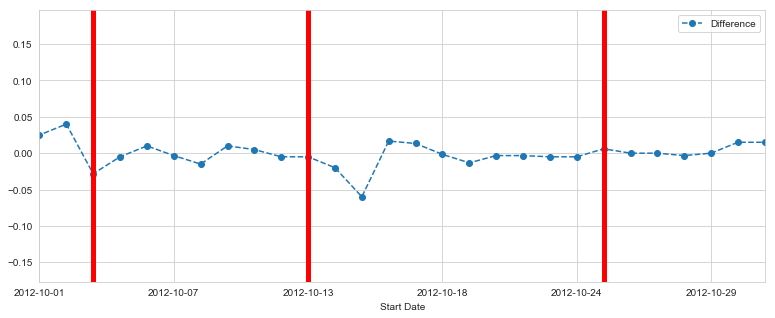

In [28]:
# Start with original figure
poll_df.plot("Start Date", "Difference", marker = "o", linestyle = "--", figsize = (13,5), xlim = (325, 352 ) )

# Now adding the debate markers
plt.axvline(x = 325+2, linewidth = 5, color = "red")

plt.axvline(x = 325+10, linewidth = 5, color = "red")

plt.axvline(x = 325+21, linewidth = 5, color = "red")

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election.

I have also taken the cumulative of the poll percentages according to the dates they started and plotted it to the see trend

In [31]:
poll_df["Obama Progress"] = poll_df.Obama.cumsum()
poll_df["Romney Progress"] = poll_df.Romney.cumsum()

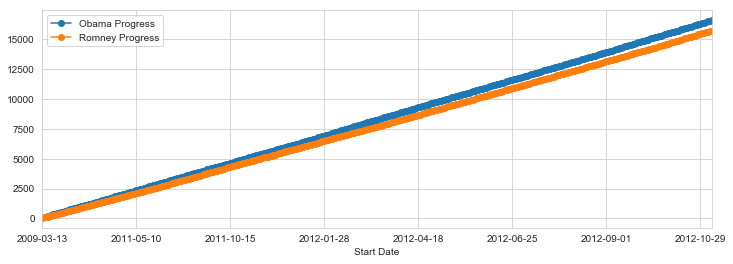

In [32]:
fig = poll_df.plot(x = 'Start Date',y =['Obama Progress', "Romney Progress"],figsize=(12,4),marker='o',linestyle='-')

So even here the trend shows that since the beginning of the surveys Obama has been little more favourable all the time until a day before the elections

Some extra stuff just to see how to make people more involved for the polling process. As I have already used groupby method on my original dataframe, I have to recall it again and perform the task

In [38]:
poll_df_2 = pd.read_csv("2012-general-election-romney-vs-obama.csv")

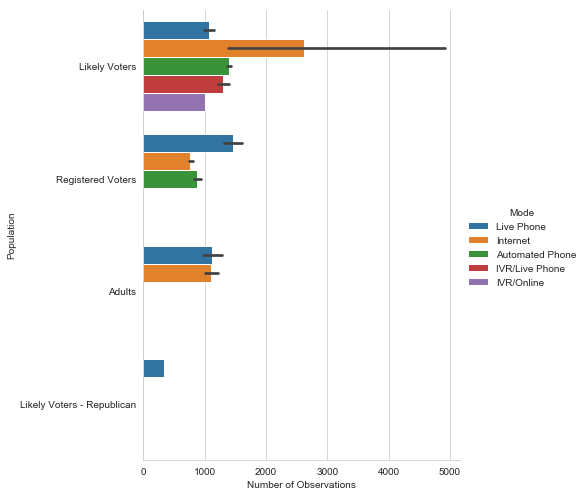

In [40]:
sns.catplot(x="Number of Observations", y = "Population", kind = "bar", hue = "Mode", data = poll_df_2, height = 7, aspect = 1)

Eventhough there is a huge standard deviation in Likely voters polled through internet, it is very clear from the plots that the method of internet and Live phone is widely used and more number of observation can be done through them

# Donor Dataset

Let's take a look at a data set consisting of information on donations to the federal campaign

The questions I will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?               
2.) How did the donations differ between candidates?          
3.) How did the donations differ between Democrats and Republicans?                
4.) What were the demographics of the donors?                                           
5.) Is there a pattern to donation amounts?

In [3]:
# Set the DataFrame as the csv file
donor_df = pd.read_csv("Election_Donor_Data.csv")
donor_df.head(3)

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [4]:
# Get a quick overview
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [5]:
# Get a quick look at the various donation amounts
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

8079 different amounts! So looking at the average and the std.

In [7]:
# avg of the donation
don_mean = donor_df["contb_receipt_amt"].mean()
don_mean

298.2351500951093

In [9]:
# standard deviation of the donation
don_std = donor_df["contb_receipt_amt"].std()
don_std

3749.666723269043

Mean is 298 dollars and standard deviation is 3749 dollars which is huge... 

In [10]:
# Checking if there are any large donations or other factors messing with the distribution of the donations
donor_df["contb_receipt_amt"].sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [13]:
# All the negative values are due to the FEC recording refunds as well as donations 
# let's only look at the positive contribution amounts
positive_donations = donor_df[donor_df["contb_receipt_amt"] > 0]

In [15]:
positive_donations["contb_receipt_amt"].value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars.

A quick question I could also verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100 Making a histogram and checking for peaks at those values should help. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

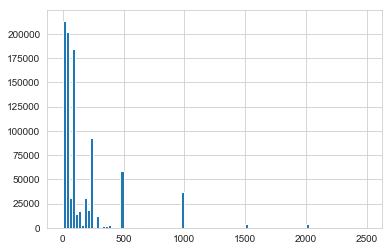

In [19]:
# Create a Series of the common donations limited to 2500
com_don = positive_donations[positive_donations["contb_receipt_amt"] < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don["contb_receipt_amt"].hist(bins=100)

Looks like the intuition was right, since the spikes are at the round numbers.

In [22]:
# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()
#Show
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

seperating Obama from the Republican Candidates by adding a Party Affiliation column

In [23]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [29]:
# Having a look on the dataframe
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Clearing all the refunds records from the contribution amounts permanently

In [31]:
donor_df = donor_df[donor_df["contb_receipt_amt"] > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's look at the total amounts received by each candidate. 
First I will look at the total number of donations and then at the total amount.

In [32]:
# Groupby candidate and then display the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Clearly Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.

In [33]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [51]:
# Trying to make the above information more representable
# Start by setting the groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print (f" The candidate {cand_amount.index[i]} raised {cand_amount.iloc[i].round()} dollars ")
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439.0 dollars 


 The candidate Cain, Herman raised 7101082.0 dollars 


 The candidate Gingrich, Newt raised 12832770.0 dollars 


 The candidate Huntsman, Jon raised 3330373.0 dollars 


 The candidate Johnson, Gary Earl raised 566962.0 dollars 


 The candidate McCotter, Thaddeus G raised 39030.0 dollars 


 The candidate Obama, Barack raised 135877427.0 dollars 


 The candidate Paul, Ron raised 21009620.0 dollars 


 The candidate Pawlenty, Timothy raised 6004819.0 dollars 


 The candidate Perry, Rick raised 20305754.0 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010.0 dollars 


 The candidate Romney, Mitt raised 88335908.0 dollars 


 The candidate Santorum, Rick raised 11043159.0 dollars 




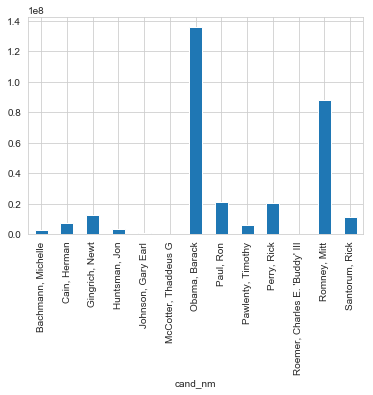

In [52]:
# Plotting out total donation amounts
cand_amount.plot(kind='bar')

Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees.

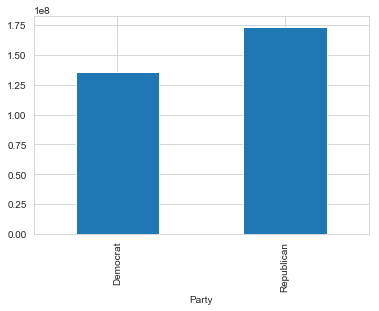

In [53]:
# Comparing Democrat versus Republican donations
# Groupby party and then count donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates

let's look at donations and who they came from (as far as occupation is concerned)

In [54]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [55]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [56]:
# Check size
occupation_df.shape

(45067, 2)

This is probably far too large to display effectively with a small, static visualization. So I will cut-off the total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give too much insight. So I set the cut off at 1 million dollars

In [58]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

# Now let's check the size!
occupation_df.shape

(31, 2)

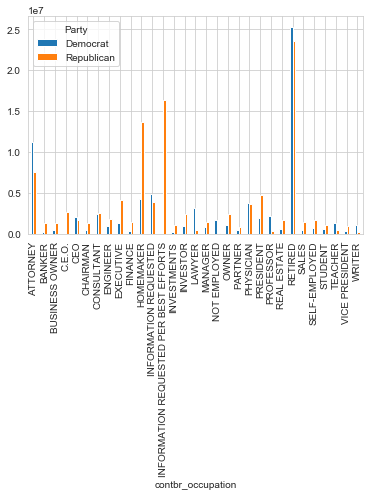

In [59]:
# plot out with pandas
occupation_df.plot(kind='bar')

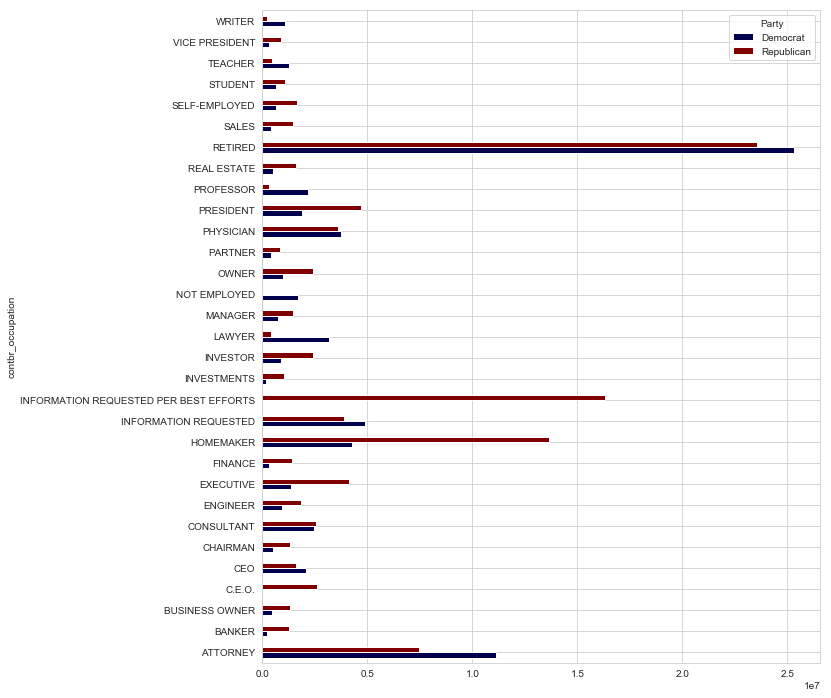

In [60]:
# Horizontal plot, use a convienently colored cmap
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [61]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [62]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

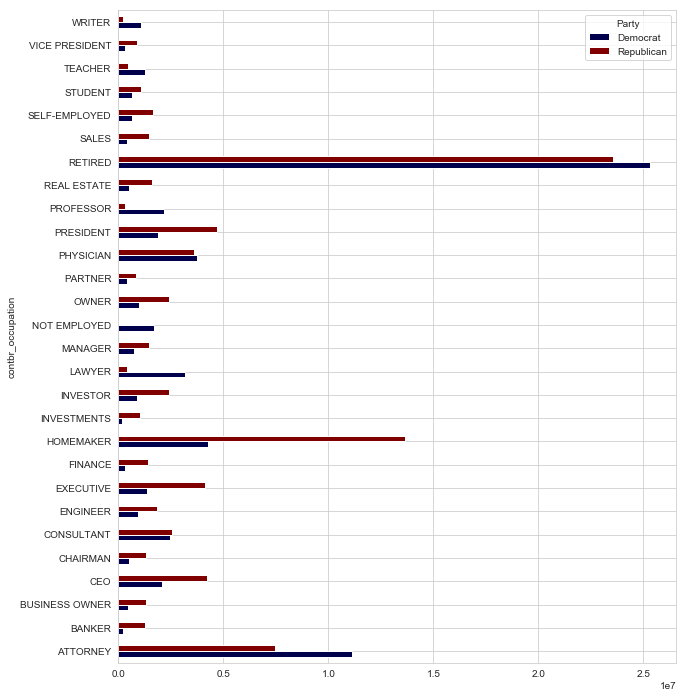

In [63]:
# Repeat previous plot!
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Looks like CEOs are a little more conservative leaning, this may be due to the tax philosphies of each party during the election.